In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

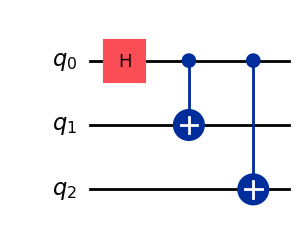

In [13]:
# Generating a three-qubit GHZ
circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)

circuit.draw('mpl')

<IPython.core.display.Latex object>

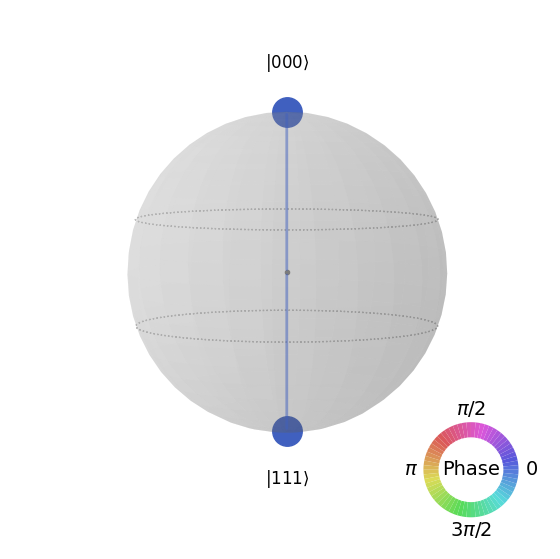

In [14]:
ket_000 = Statevector.from_label('000')

GHZ_state = ket_000.evolve(circuit)

display(GHZ_state.draw('latex'))
display(GHZ_state.draw('qsphere'))


In [16]:
from qiskit.quantum_info import Operator

# representing the entire operator as a single unitary matrix
U = Operator(circuit)
U.draw('latex')

<IPython.core.display.Latex object>

#### OpenQASM Backend 

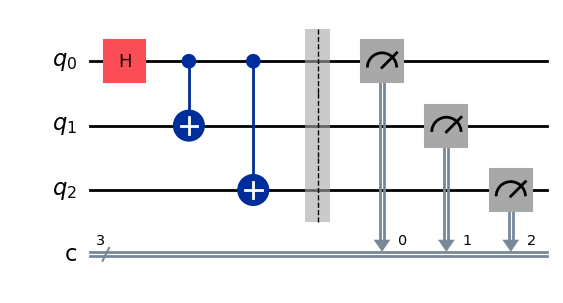

In [18]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qc = meas.compose(circuit, range(3), front = True)

qc.draw('mpl')

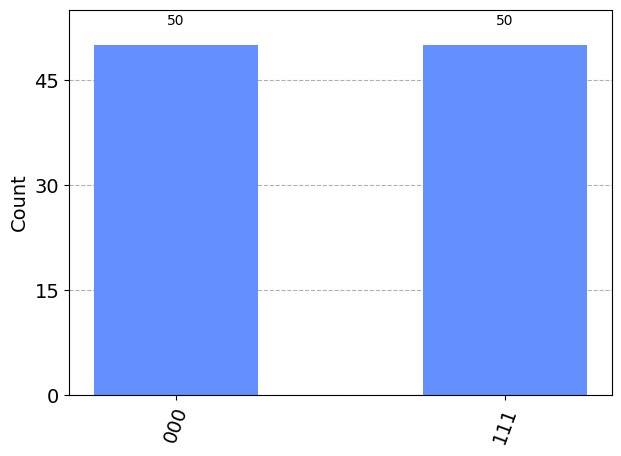

In [52]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

backend = AerSimulator()
qc_compiled = transpile(qc, backend)

job_simulator = backend.run(qc_compiled, shots = 100)
result_simulator = job_simulator.result().get_counts(qc_compiled)

plot_histogram(result_simulator)